Weather Prediction SK Version 

PRCP = Precipitation (mm or inches as per user preference, inches to hundredths on Daily Form pdf file)
SNOW = Snowfall (mm or inches as per user preference, inches to tenths on Daily Form pdf file)
SNWD = Snow depth (mm or inches as per user preference, inches on Daily Form pdf file)
TMAX = Maximum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on
Daily Form pdf file
TMIN = Minimum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on

In [4]:
import pandas as pd 

In [5]:
weather = pd.read_csv("3183312.csv", index_col="DATE")

In [6]:
weather

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
DATE,,,,,,,,,,,,,,,
1973-03-01,LOM00011826,"PIESTANY, LO",48.617,17.833,164.0,0.01,"B,,S",0.4,",,S",35,"H,,S",39.0,",,S",28.0,",,S"
1973-03-02,LOM00011826,"PIESTANY, LO",48.617,17.833,164.0,0.00,"B,,S",NaN,NaN,38,"H,,S",46.0,",,S",32.0,",,S"
1973-03-03,LOM00011826,"PIESTANY, LO",48.617,17.833,164.0,0.01,"B,,S",NaN,NaN,37,"H,,S",39.0,",,S",34.0,",,S"
1973-03-04,LOM00011826,"PIESTANY, LO",48.617,17.833,164.0,0.00,"B,,S",NaN,NaN,39,"H,,S",45.0,",,S",34.0,",,S"
1973-03-05,LOM00011826,"PIESTANY, LO",48.617,17.833,164.0,0.00,"B,,S",NaN,NaN,40,"H,,S",48.0,",,S",30.0,",,S"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-20,LOM00011826,"PIESTANY, LO",48.617,17.833,164.0,NaN,NaN,NaN,NaN,33,"H,,S",NaN,NaN,31.0,",,S"
2022-12-21,LOM00011826,"PIESTANY, LO",48.617,17.833,164.0,NaN,NaN,NaN,NaN,34,"H,,S",NaN,NaN,NaN,NaN
2022-12-22,LOM00011826,"PIESTANY, LO",48.617,17.833,164.0,0.02,",,S",NaN,NaN,34,"H,,S",NaN,NaN,32.0,",,S"


data missing values 

In [7]:
weather.apply(pd.isnull).sum()/weather.shape[0]  #% of no value in each column

STATION            0.000000
NAME               0.000000
LATITUDE           0.000000
LONGITUDE          0.000000
ELEVATION          0.000000
PRCP               0.170381
PRCP_ATTRIBUTES    0.170381
SNWD               0.923394
SNWD_ATTRIBUTES    0.923394
TAVG               0.000000
TAVG_ATTRIBUTES    0.000000
TMAX               0.176490
TMAX_ATTRIBUTES    0.176490
TMIN               0.246712
TMIN_ATTRIBUTES    0.246712
dtype: float64

In [8]:
core_weather = weather [["NAME","LONGITUDE","LATITUDE","ELEVATION","TAVG","TMAX","TMIN","SNWD","PRCP"]].copy()

In [9]:
core_weather

,NAME,LONGITUDE,LATITUDE,ELEVATION,TAVG,TMAX,TMIN,SNWD,PRCP
DATE,,,,,,,,,
1973-03-01,"PIESTANY, LO",17.833,48.617,164.0,35,39.0,28.0,0.4,0.01
1973-03-02,"PIESTANY, LO",17.833,48.617,164.0,38,46.0,32.0,NaN,0.00
1973-03-03,"PIESTANY, LO",17.833,48.617,164.0,37,39.0,34.0,NaN,0.01
1973-03-04,"PIESTANY, LO",17.833,48.617,164.0,39,45.0,34.0,NaN,0.00
1973-03-05,"PIESTANY, LO",17.833,48.617,164.0,40,48.0,30.0,NaN,0.00
...,...,...,...,...,...,...,...,...,...
2022-12-20,"PIESTANY, LO",17.833,48.617,164.0,33,NaN,31.0,NaN,NaN
2022-12-21,"PIESTANY, LO",17.833,48.617,164.0,34,NaN,NaN,NaN,NaN
2022-12-22,"PIESTANY, LO",17.833,48.617,164.0,34,NaN,32.0,NaN,0.02


In [10]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]  

NAME         0.000000
LONGITUDE    0.000000
LATITUDE     0.000000
ELEVATION    0.000000
TAVG         0.000000
TMAX         0.176490
TMIN         0.246712
SNWD         0.923394
PRCP         0.170381
dtype: float64

In [11]:
core_weather["TMAX"] #MAX TEMPRERATURE IN SLOVAKIA 

DATE
1973-03-01    39.0
1973-03-02    46.0
1973-03-03    39.0
1973-03-04    45.0
1973-03-05    48.0
              ... 
2022-12-20     NaN
2022-12-21     NaN
2022-12-22     NaN
2022-12-23     NaN
2022-12-24     NaN
Name: TMAX, Length: 18171, dtype: float64

MOST RAINY DAYS 

In [12]:
core_weather["PRCP"]

DATE
1973-03-01    0.01
1973-03-02    0.00
1973-03-03    0.01
1973-03-04    0.00
1973-03-05    0.00
              ... 
2022-12-20     NaN
2022-12-21     NaN
2022-12-22    0.02
2022-12-23    0.09
2022-12-24    0.24
Name: PRCP, Length: 18171, dtype: float64

ANY MISSING VALUES, MISSING DATA? 

In [13]:
core_weather[pd.isnull(core_weather["TMAX"])]

,NAME,LONGITUDE,LATITUDE,ELEVATION,TAVG,TMAX,TMIN,SNWD,PRCP
DATE,,,,,,,,,
1973-04-03,"PIESTANY, LO",17.833,48.617,164.0,47,NaN,NaN,NaN,0.08
1973-04-09,"PIESTANY, LO",17.833,48.617,164.0,44,NaN,36.0,NaN,0.31
1973-05-07,"PIESTANY, LO",17.833,48.617,164.0,58,NaN,54.0,NaN,0.10
1973-07-12,"PIESTANY, LO",17.833,48.617,164.0,68,NaN,50.0,NaN,0.00
1973-07-23,"PIESTANY, LO",17.833,48.617,164.0,64,NaN,57.0,NaN,0.05
...,...,...,...,...,...,...,...,...,...
2022-12-20,"PIESTANY, LO",17.833,48.617,164.0,33,NaN,31.0,NaN,NaN
2022-12-21,"PIESTANY, LO",17.833,48.617,164.0,34,NaN,NaN,NaN,NaN
2022-12-22,"PIESTANY, LO",17.833,48.617,164.0,34,NaN,32.0,NaN,0.02


IN THESE YEARS WE DONT HAVE DATA 

WHAT HAPPENED IN THESE YEARS ? 

In [14]:
core_weather.loc["1980-04-03":"2022-24-12",:] 

,NAME,LONGITUDE,LATITUDE,ELEVATION,TAVG,TMAX,TMIN,SNWD,PRCP
DATE,,,,,,,,,
1980-04-03,"PIESTANY, LO",17.833,48.617,164.0,40,46.0,36.0,NaN,0.02
1980-04-04,"PIESTANY, LO",17.833,48.617,164.0,38,43.0,36.0,NaN,0.01
1980-04-05,"PIESTANY, LO",17.833,48.617,164.0,37,45.0,36.0,NaN,0.00
1980-04-06,"PIESTANY, LO",17.833,48.617,164.0,40,46.0,36.0,NaN,0.00
1980-04-07,"PIESTANY, LO",17.833,48.617,164.0,46,55.0,39.0,NaN,0.00
...,...,...,...,...,...,...,...,...,...
2022-12-20,"PIESTANY, LO",17.833,48.617,164.0,33,NaN,31.0,NaN,NaN
2022-12-21,"PIESTANY, LO",17.833,48.617,164.0,34,NaN,NaN,NaN,NaN
2022-12-22,"PIESTANY, LO",17.833,48.617,164.0,34,NaN,32.0,NaN,0.02


In [15]:
core_weather[pd.isnull(core_weather["TMIN"])]   #ALL TMIN WITH no data 

,NAME,LONGITUDE,LATITUDE,ELEVATION,TAVG,TMAX,TMIN,SNWD,PRCP
DATE,,,,,,,,,
1973-03-06,"PIESTANY, LO",17.833,48.617,164.0,39,48.0,NaN,NaN,0.00
1973-03-08,"PIESTANY, LO",17.833,48.617,164.0,37,45.0,NaN,NaN,0.04
1973-03-19,"PIESTANY, LO",17.833,48.617,164.0,38,45.0,NaN,NaN,0.00
1973-03-22,"PIESTANY, LO",17.833,48.617,164.0,44,55.0,NaN,NaN,0.00
1973-03-27,"PIESTANY, LO",17.833,48.617,164.0,54,59.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-12-13,"PIESTANY, LO",17.833,48.617,164.0,27,NaN,NaN,NaN,0.00
2022-12-16,"PIESTANY, LO",17.833,48.617,164.0,34,NaN,NaN,0.4,0.37
2022-12-17,"PIESTANY, LO",17.833,48.617,164.0,28,NaN,NaN,NaN,0.13


In [16]:
core_weather[pd.isnull(core_weather["SNWD"])] #ALL SNOW WITH NO DATA 

,NAME,LONGITUDE,LATITUDE,ELEVATION,TAVG,TMAX,TMIN,SNWD,PRCP
DATE,,,,,,,,,
1973-03-02,"PIESTANY, LO",17.833,48.617,164.0,38,46.0,32.0,NaN,0.00
1973-03-03,"PIESTANY, LO",17.833,48.617,164.0,37,39.0,34.0,NaN,0.01
1973-03-04,"PIESTANY, LO",17.833,48.617,164.0,39,45.0,34.0,NaN,0.00
1973-03-05,"PIESTANY, LO",17.833,48.617,164.0,40,48.0,30.0,NaN,0.00
1973-03-06,"PIESTANY, LO",17.833,48.617,164.0,39,48.0,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...
2022-12-19,"PIESTANY, LO",17.833,48.617,164.0,29,NaN,15.0,NaN,NaN
2022-12-20,"PIESTANY, LO",17.833,48.617,164.0,33,NaN,31.0,NaN,NaN
2022-12-21,"PIESTANY, LO",17.833,48.617,164.0,34,NaN,NaN,NaN,NaN


In [17]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]  

NAME         0.000000
LONGITUDE    0.000000
LATITUDE     0.000000
ELEVATION    0.000000
TAVG         0.000000
TMAX         0.176490
TMIN         0.246712
SNWD         0.923394
PRCP         0.170381
dtype: float64

LETS CHECK DATA TYPES 

In [18]:
core_weather.dtypes

NAME          object
LONGITUDE    float64
LATITUDE     float64
ELEVATION    float64
TAVG           int64
TMAX         float64
TMIN         float64
SNWD         float64
PRCP         float64
dtype: object

CONVERT INTO DATETIME

In [19]:
core_weather.index = pd.to_datetime(core_weather.index)

In [20]:
core_weather.index

DatetimeIndex(['1973-03-01', '1973-03-02', '1973-03-03', '1973-03-04',
               '1973-03-05', '1973-03-06', '1973-03-07', '1973-03-08',
               '1973-03-09', '1973-03-10',
               ...
               '2022-12-15', '2022-12-16', '2022-12-17', '2022-12-18',
               '2022-12-19', '2022-12-20', '2022-12-21', '2022-12-22',
               '2022-12-23', '2022-12-24'],
              dtype='datetime64[ns]', name='DATE', length=18171, freq=None)

In [21]:
core_weather.index.year   #if we want to look at years just 

Int64Index([1973, 1973, 1973, 1973, 1973, 1973, 1973, 1973, 1973, 1973,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='DATE', length=18171)

In [22]:
core_weather.apply(lambda x:(x==9999).sum())  #NO DATA WITH VALUES 9999

NAME         0
LONGITUDE    0
LATITUDE     0
ELEVATION    0
TAVG         0
TMAX         0
TMIN         0
SNWD         0
PRCP         0
dtype: int64

MAX AND MIN TEMPERATURE OVER YEARS 

<AxesSubplot:xlabel='DATE'>

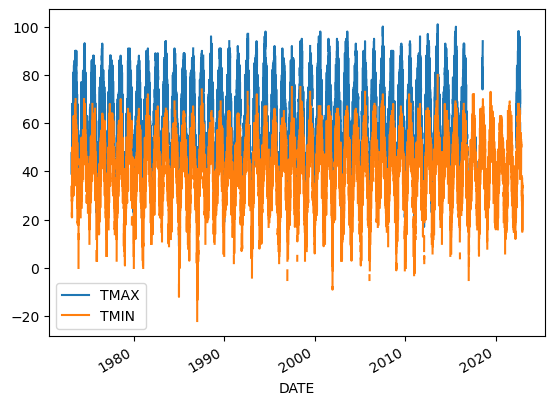

In [23]:
core_weather[["TMAX","TMIN"]].plot()

RAINING PLOT 

<AxesSubplot:xlabel='DATE'>

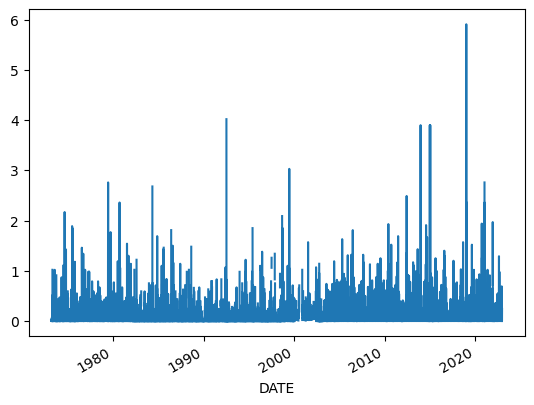

In [24]:
core_weather["PRCP"].plot()

In [25]:
#raining over years more detailed 
core_weather.groupby(core_weather.index.year).sum() 

,LONGITUDE,LATITUDE,ELEVATION,TAVG,TMAX,TMIN,SNWD,PRCP
DATE,,,,,,,,
1973,5456.898,14876.802,50184.0,15987,17659.0,10271.0,1.6,14.01
1974,6509.045,17745.205,59860.0,18243,19989.0,11696.0,0.0,26.11
1975,6491.212,17696.588,59696.0,18206,19300.0,12166.0,0.0,20.04
1976,6509.045,17745.205,59860.0,18214,20164.0,12819.0,0.0,23.79
1977,6509.045,17745.205,59860.0,18025,20124.0,11307.0,0.0,19.74
1978,6509.045,17745.205,59860.0,17409,19801.0,11481.0,0.0,13.88
1979,6473.379,17647.971,59532.0,17742,19973.0,12262.0,0.0,26.82
1980,6526.878,17793.822,60024.0,16830,19259.0,11716.0,0.0,22.91
1981,6509.045,17745.205,59860.0,17748,20139.0,11659.0,0.0,21.96


Maximum temperature is: 

In [26]:
max_temp = core_weather["TMAX"].max()

In [27]:
max_temp

101.0

Predicting max temperature

In [28]:
core_weather["target"] = core_weather.shift(-1)["TMAX"]

In [29]:
core_weather

,NAME,LONGITUDE,LATITUDE,ELEVATION,TAVG,TMAX,TMIN,SNWD,PRCP,target
DATE,,,,,,,,,,
1973-03-01,"PIESTANY, LO",17.833,48.617,164.0,35,39.0,28.0,0.4,0.01,46.0
1973-03-02,"PIESTANY, LO",17.833,48.617,164.0,38,46.0,32.0,NaN,0.00,39.0
1973-03-03,"PIESTANY, LO",17.833,48.617,164.0,37,39.0,34.0,NaN,0.01,45.0
1973-03-04,"PIESTANY, LO",17.833,48.617,164.0,39,45.0,34.0,NaN,0.00,48.0
1973-03-05,"PIESTANY, LO",17.833,48.617,164.0,40,48.0,30.0,NaN,0.00,48.0
...,...,...,...,...,...,...,...,...,...,...
2022-12-20,"PIESTANY, LO",17.833,48.617,164.0,33,NaN,31.0,NaN,NaN,NaN
2022-12-21,"PIESTANY, LO",17.833,48.617,164.0,34,NaN,NaN,NaN,NaN,NaN
2022-12-22,"PIESTANY, LO",17.833,48.617,164.0,34,NaN,32.0,NaN,0.02,NaN


In [30]:
weather.tail(10)  #last records , last 10days 

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
DATE,,,,,,,,,,,,,,,
2022-12-15,LOM00011826,"PIESTANY, LO",48.617,17.833,164.0,NaN,NaN,NaN,NaN,32,"H,,S",NaN,NaN,30.0,",,S"
2022-12-16,LOM00011826,"PIESTANY, LO",48.617,17.833,164.0,0.37,",,S",0.4,",,S",34,"H,,S",NaN,NaN,NaN,NaN
2022-12-17,LOM00011826,"PIESTANY, LO",48.617,17.833,164.0,0.13,",,S",NaN,NaN,28,"H,,S",NaN,NaN,NaN,NaN
2022-12-18,LOM00011826,"PIESTANY, LO",48.617,17.833,164.0,0.00,",,S",NaN,NaN,21,"H,,S",NaN,NaN,15.0,",,S"
2022-12-19,LOM00011826,"PIESTANY, LO",48.617,17.833,164.0,NaN,NaN,NaN,NaN,29,"H,,S",NaN,NaN,15.0,",,S"
2022-12-20,LOM00011826,"PIESTANY, LO",48.617,17.833,164.0,NaN,NaN,NaN,NaN,33,"H,,S",NaN,NaN,31.0,",,S"
2022-12-21,LOM00011826,"PIESTANY, LO",48.617,17.833,164.0,NaN,NaN,NaN,NaN,34,"H,,S",NaN,NaN,NaN,NaN
2022-12-22,LOM00011826,"PIESTANY, LO",48.617,17.833,164.0,0.02,",,S",NaN,NaN,34,"H,,S",NaN,NaN,32.0,",,S"
2022-12-23,LOM00011826,"PIESTANY, LO",48.617,17.833,164.0,0.09,",,S",NaN,NaN,37,"H,,S",NaN,NaN,34.0,",,S"


In [31]:
core_weather=core_weather.iloc[:-5,:].copy()   #this takes last 5 rows out of the table because it has NaNf

In [32]:
core_weather

,NAME,LONGITUDE,LATITUDE,ELEVATION,TAVG,TMAX,TMIN,SNWD,PRCP,target
DATE,,,,,,,,,,
1973-03-01,"PIESTANY, LO",17.833,48.617,164.0,35,39.0,28.0,0.4,0.01,46.0
1973-03-02,"PIESTANY, LO",17.833,48.617,164.0,38,46.0,32.0,NaN,0.00,39.0
1973-03-03,"PIESTANY, LO",17.833,48.617,164.0,37,39.0,34.0,NaN,0.01,45.0
1973-03-04,"PIESTANY, LO",17.833,48.617,164.0,39,45.0,34.0,NaN,0.00,48.0
1973-03-05,"PIESTANY, LO",17.833,48.617,164.0,40,48.0,30.0,NaN,0.00,48.0
...,...,...,...,...,...,...,...,...,...,...
2022-12-15,"PIESTANY, LO",17.833,48.617,164.0,32,NaN,30.0,NaN,NaN,NaN
2022-12-16,"PIESTANY, LO",17.833,48.617,164.0,34,NaN,NaN,0.4,0.37,NaN
2022-12-17,"PIESTANY, LO",17.833,48.617,164.0,28,NaN,NaN,NaN,0.13,NaN


GET RID OF NaN VALUES

In [36]:
#get rid off NaN values 
#core_weather.dropna(subset=["TMAX"], axis=0, inplace=True)   #axis=0 drop entire row

In [354]:
core_weather.isnull()  #all columns are negative because they have value more than 0 or not even 0

,NAME,LONGITUDE,LATITUDE,ELEVATION,TAVG,TMAX,TMIN,SNWD,PRCP,target,month_max_average,month_day_max,monthly_average,day_of_year_average,date,year
DATE,,,,,,,,,,,,,,,,
1986-01-03,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1986-01-11,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1986-01-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1986-01-13,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1986-01-14,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-22,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2016-01-23,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2016-01-26,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


dropna can be helpful.
On a Series, it returns the Series with only the non-null data and index values:
In [15]: from numpy import nan as NA
In [16]: data = pd.Series([1, NA, 3.5, NA, 7])
In [17]: data.dropna()
Out[17]:
0 1.0
2 3.5
4 7.0
dtype: float64

In [ ]:
#You may want to drop rows
#or columns that are all NA or only those containing any NAs. dropna by default drops
#any row containing a missing value:
#In [19]: data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
#....: [NA, NA, NA], [NA, 6.5, 3.]])
#In [20]: cleaned = data.dropna()
#In [21]: data
#Out[21]:
#0 1 2
#0 1.0 6.5 3.0
#1 1.0 NaN NaN
#2 NaN NaN NaN
#3 NaN 6.5 3.0
#In [22]: cleaned
#Out[22]:
#0 1 2
#0 1.0 6.5 3.0

In [355]:
#To drop columns in the same way, pass axis=1:
#In [24]: data[4] = NA
#In [25]: data
#Out[25]:
#0 1 2 4
#0 1.0 6.5 3.0 NaN
#1 1.0 NaN NaN NaN
#2 NaN NaN NaN NaN
#3 NaN 6.5 3.0 NaN
#In [26]: data.dropna(axis=1, how='all')
#Out[26]:
#0 1 2
#0 1.0 6.5 3.0
#1 1.0 NaN NaN
#2 NaN NaN NaN
#3 NaN 6.5 3.0

In [356]:
#With fillna you can do lots of other things with a little creativity. For example, you
#might pass the mean or median value of a Series:
#In [43]: data = pd.Series([1., NA, 3.5, NA, 7])
#In [44]: data.fillna(data.mean())
#Out[44]:
#0 1.000000
#1 3.833333
#2 3.500000
#dtype: float64

In [359]:
# fillna function arguments
#Argument - Description
#value - Scalar value or dict-like object to use to fill missing values
#method - Interpolation; by default 'ffill' if function called with no other arguments
#axis - Axis to fill on; default axis=0
#inplace - Modify the calling object without producing a copy
#limit - For forward and backward filling, maximum number of consecutive periods to fill

In [358]:
core_weather["TMAX"].fillna(core_weather.mean())  #mean of TMAX

C:\Users\User\AppData\Local\Temp\ipykernel_21076\3154392098.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  core_weather["TMAX"].fillna(core_weather.mean())  #mean of TMAX
C:\Users\User\AppData\Local\Temp\ipykernel_21076\3154392098.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  core_weather["TMAX"].fillna(core_weather.mean())  #mean of TMAX


DATE
1986-01-03    33.0
1986-01-11    25.0
1986-01-12    27.0
1986-01-13    39.0
1986-01-14    46.0
              ... 
2016-01-22    29.0
2016-01-23    27.0
2016-01-26    36.0
2017-01-04    38.0
2018-02-17    35.0
Name: TMAX, Length: 651, dtype: float64

Are there duplicates in the table? 

In [362]:
core_weather.duplicated()   #as you can see its fallse, so no duplicates in dataset

DATE
1986-01-03    False
1986-01-11    False
1986-01-12    False
1986-01-13    False
1986-01-14    False
              ...  
2016-01-22    False
2016-01-23    False
2016-01-26    False
2017-01-04    False
2018-02-17    False
Length: 651, dtype: bool

In [363]:
#specified duplicates based on year and date and leav last column, last numer in it
core_weather = core_weather.drop_duplicates(['year', 'date'], keep='last')

In [365]:
core_weather  #number of rows is same as before so we dont have any duplicates in years and dates in our table 

,NAME,LONGITUDE,LATITUDE,ELEVATION,TAVG,TMAX,TMIN,SNWD,PRCP,target,month_max_average,month_day_max,monthly_average,day_of_year_average,date,year
DATE,,,,,,,,,,,,,,,,
1986-01-03,"PIESTANY, LO",17.833,48.617,164.0,31,33.0,29.0,1.2,0.00,25.0,31.100000,0.942424,33.000000,33.000000,1986-01-03,1986
1986-01-11,"PIESTANY, LO",17.833,48.617,164.0,19,25.0,8.0,0.8,0.18,27.0,31.033333,1.241333,29.000000,25.000000,1986-01-11,1986
1986-01-12,"PIESTANY, LO",17.833,48.617,164.0,25,27.0,23.0,4.7,0.15,39.0,30.600000,1.133333,28.333333,27.000000,1986-01-12,1986
1986-01-13,"PIESTANY, LO",17.833,48.617,164.0,33,39.0,14.0,5.9,0.05,46.0,30.666667,0.786325,31.000000,39.000000,1986-01-13,1986
1986-01-14,"PIESTANY, LO",17.833,48.617,164.0,38,46.0,34.0,2.0,0.28,41.0,31.433333,0.683333,34.000000,46.000000,1986-01-14,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-22,"PIESTANY, LO",17.833,48.617,164.0,15,29.0,6.0,0.8,0.00,27.0,34.533333,1.190805,31.339623,32.500000,2016-01-22,2016
2016-01-23,"PIESTANY, LO",17.833,48.617,164.0,20,27.0,4.0,1.2,0.00,36.0,34.333333,1.271605,31.319249,30.666667,2016-01-23,2016
2016-01-26,"PIESTANY, LO",17.833,48.617,164.0,33,36.0,31.0,1.2,0.24,38.0,34.533333,0.959259,31.341121,30.166667,2016-01-26,2016


USING OF LOWERCASE

In [375]:
lowercased = core_weather['NAME'].str.lower()

In [376]:
print(lowercased)

DATE
1986-01-03    piestany, lo
1986-01-11    piestany, lo
1986-01-12    piestany, lo
1986-01-13    piestany, lo
1986-01-14    piestany, lo
                  ...     
2016-01-22    piestany, lo
2016-01-23    piestany, lo
2016-01-26    piestany, lo
2017-01-04    piestany, lo
2018-02-17    piestany, lo
Name: NAME, Length: 651, dtype: object


In [378]:
core_weather['NAME'] = core_weather['NAME'].apply(lambda x: x.lower())   #same but updating talbe

In [379]:
core_weather

,NAME,LONGITUDE,LATITUDE,ELEVATION,TAVG,TMAX,TMIN,SNWD,PRCP,target,month_max_average,month_day_max,monthly_average,day_of_year_average,date,year
DATE,,,,,,,,,,,,,,,,
1986-01-03,"piestany, lo",17.833,48.617,164.0,31,33.0,29.0,1.2,0.00,25.0,31.100000,0.942424,33.000000,33.000000,1986-01-03,1986
1986-01-11,"piestany, lo",17.833,48.617,164.0,19,25.0,8.0,0.8,0.18,27.0,31.033333,1.241333,29.000000,25.000000,1986-01-11,1986
1986-01-12,"piestany, lo",17.833,48.617,164.0,25,27.0,23.0,4.7,0.15,39.0,30.600000,1.133333,28.333333,27.000000,1986-01-12,1986
1986-01-13,"piestany, lo",17.833,48.617,164.0,33,39.0,14.0,5.9,0.05,46.0,30.666667,0.786325,31.000000,39.000000,1986-01-13,1986
1986-01-14,"piestany, lo",17.833,48.617,164.0,38,46.0,34.0,2.0,0.28,41.0,31.433333,0.683333,34.000000,46.000000,1986-01-14,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-22,"piestany, lo",17.833,48.617,164.0,15,29.0,6.0,0.8,0.00,27.0,34.533333,1.190805,31.339623,32.500000,2016-01-22,2016
2016-01-23,"piestany, lo",17.833,48.617,164.0,20,27.0,4.0,1.2,0.00,36.0,34.333333,1.271605,31.319249,30.666667,2016-01-23,2016
2016-01-26,"piestany, lo",17.833,48.617,164.0,33,36.0,31.0,1.2,0.24,38.0,34.533333,0.959259,31.341121,30.166667,2016-01-26,2016


Replace 

In [380]:
core_weather.replace([-999, -1000], np.nan)  #replace -999 and 1000 with NaN

,NAME,LONGITUDE,LATITUDE,ELEVATION,TAVG,TMAX,TMIN,SNWD,PRCP,target,month_max_average,month_day_max,monthly_average,day_of_year_average,date,year
DATE,,,,,,,,,,,,,,,,
1986-01-03,"piestany, lo",17.833,48.617,164.0,31,33.0,29.0,1.2,0.00,25.0,31.100000,0.942424,33.000000,33.000000,1986-01-03,1986
1986-01-11,"piestany, lo",17.833,48.617,164.0,19,25.0,8.0,0.8,0.18,27.0,31.033333,1.241333,29.000000,25.000000,1986-01-11,1986
1986-01-12,"piestany, lo",17.833,48.617,164.0,25,27.0,23.0,4.7,0.15,39.0,30.600000,1.133333,28.333333,27.000000,1986-01-12,1986
1986-01-13,"piestany, lo",17.833,48.617,164.0,33,39.0,14.0,5.9,0.05,46.0,30.666667,0.786325,31.000000,39.000000,1986-01-13,1986
1986-01-14,"piestany, lo",17.833,48.617,164.0,38,46.0,34.0,2.0,0.28,41.0,31.433333,0.683333,34.000000,46.000000,1986-01-14,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-22,"piestany, lo",17.833,48.617,164.0,15,29.0,6.0,0.8,0.00,27.0,34.533333,1.190805,31.339623,32.500000,2016-01-22,2016
2016-01-23,"piestany, lo",17.833,48.617,164.0,20,27.0,4.0,1.2,0.00,36.0,34.333333,1.271605,31.319249,30.666667,2016-01-23,2016
2016-01-26,"piestany, lo",17.833,48.617,164.0,33,36.0,31.0,1.2,0.24,38.0,34.533333,0.959259,31.341121,30.166667,2016-01-26,2016


In [381]:
core_weather.replace({-999: np.nan, -1000: 0})  #replace -999 to NaN and -1000 to 0

,NAME,LONGITUDE,LATITUDE,ELEVATION,TAVG,TMAX,TMIN,SNWD,PRCP,target,month_max_average,month_day_max,monthly_average,day_of_year_average,date,year
DATE,,,,,,,,,,,,,,,,
1986-01-03,"piestany, lo",17.833,48.617,164.0,31,33.0,29.0,1.2,0.00,25.0,31.100000,0.942424,33.000000,33.000000,1986-01-03,1986
1986-01-11,"piestany, lo",17.833,48.617,164.0,19,25.0,8.0,0.8,0.18,27.0,31.033333,1.241333,29.000000,25.000000,1986-01-11,1986
1986-01-12,"piestany, lo",17.833,48.617,164.0,25,27.0,23.0,4.7,0.15,39.0,30.600000,1.133333,28.333333,27.000000,1986-01-12,1986
1986-01-13,"piestany, lo",17.833,48.617,164.0,33,39.0,14.0,5.9,0.05,46.0,30.666667,0.786325,31.000000,39.000000,1986-01-13,1986
1986-01-14,"piestany, lo",17.833,48.617,164.0,38,46.0,34.0,2.0,0.28,41.0,31.433333,0.683333,34.000000,46.000000,1986-01-14,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-22,"piestany, lo",17.833,48.617,164.0,15,29.0,6.0,0.8,0.00,27.0,34.533333,1.190805,31.339623,32.500000,2016-01-22,2016
2016-01-23,"piestany, lo",17.833,48.617,164.0,20,27.0,4.0,1.2,0.00,36.0,34.333333,1.271605,31.319249,30.666667,2016-01-23,2016
2016-01-26,"piestany, lo",17.833,48.617,164.0,33,36.0,31.0,1.2,0.24,38.0,34.533333,0.959259,31.341121,30.166667,2016-01-26,2016


Print me the certain data based on input 

In [387]:
row_2_col_3 = core_weather.iloc[1, 2]    
print(row_2_col_3)

48.617


In [394]:
core_weather = core_weather.rename(columns={'NAME': 'MENO'})

In [395]:
core_weather

,LONGITUDE,LATITUDE,ELEVATION,TAVG,SNWD,PRCP,target,month_max_average,month_day_max,monthly_average,day_of_year_average,year
TMIN,,,,,,,,,,,,
-22.000000,17.833,48.617,164.0,-5.000000,11.400000,0.000000,32.000000,30.500000,3.812500,30.333333,23.500000,1987.000000
-5.000000,17.833,48.617,164.0,6.000000,5.900000,0.000000,23.000000,31.258333,1.736574,32.090862,27.607143,1998.750000
-2.400000,17.833,48.617,164.0,8.600000,6.460000,0.000000,20.600000,30.680000,1.614737,31.124116,22.619048,1994.000000
-2.000000,17.833,48.617,164.0,6.583333,3.516667,0.000000,21.666667,32.930556,1.998754,32.132620,27.163095,2002.916667
3.000000,17.833,48.617,164.0,8.000000,1.600000,0.000000,28.000000,31.933333,2.128889,34.333333,15.000000,1987.000000
9.500000,17.833,48.617,164.0,15.000000,1.200000,0.000000,27.000000,31.533333,1.501587,33.364096,31.321429,2007.500000
9.666667,17.833,48.617,164.0,17.166667,2.633333,0.011667,32.000000,33.144444,1.506566,31.901819,28.468519,2001.833333
10.000000,17.833,48.617,164.0,15.800000,2.960000,0.040000,22.800000,31.300000,1.565000,32.083421,25.409524,1998.600000
12.161290,17.833,48.617,164.0,20.096774,2.716129,0.006774,29.225806,33.672043,1.295079,32.362169,29.952629,2003.129032


In [405]:
core_weather.describe()

,LONGITUDE,LATITUDE,ELEVATION,TAVG,SNWD,PRCP,target,month_max_average,month_day_max,monthly_average,day_of_year_average,year
count,3.600000e+01,3.600000e+01,36.0,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,1.783300e+01,4.861700e+01,164.0,25.671277,3.464056,0.053893,32.258533,33.117473,1.184760,33.693877,32.849448,1999.636330
std,1.104039e-14,2.145120e-14,0.0,11.872678,3.475348,0.055613,5.333195,1.160278,0.589972,2.881447,6.238676,4.166398
min,1.783300e+01,4.861700e+01,164.0,-5.000000,1.150000,0.000000,20.600000,30.500000,0.611655,30.333333,15.000000,1987.000000
25%,1.783300e+01,4.861700e+01,164.0,19.258824,2.194464,0.010444,29.506452,32.700884,0.811601,32.314754,29.763184,1998.062500
50%,1.783300e+01,4.861700e+01,164.0,26.795565,2.699731,0.043625,32.032258,33.402903,1.043617,33.290023,32.940842,2000.679487
75%,1.783300e+01,4.861700e+01,164.0,34.152308,3.254493,0.073750,35.747321,33.716325,1.383172,34.158616,36.464973,2001.762500
max,1.783300e+01,4.861700e+01,164.0,46.833333,20.700000,0.243750,42.000000,36.766667,3.812500,48.715295,50.745833,2007.500000


Agregate the data 

In [416]:
core_weather = core_weather.groupby('TMIN').mean()

In [413]:
core_weather

,LONGITUDE,LATITUDE,ELEVATION,TAVG,SNWD,PRCP,target,month_max_average,month_day_max,monthly_average,day_of_year_average,year
TMIN,,,,,,,,,,,,
-22.000000,17.833,48.617,164.0,-5.000000,11.400000,0.000000,32.000000,30.500000,3.812500,30.333333,23.500000,1987.000000
-5.000000,17.833,48.617,164.0,6.000000,5.900000,0.000000,23.000000,31.258333,1.736574,32.090862,27.607143,1998.750000
-2.400000,17.833,48.617,164.0,8.600000,6.460000,0.000000,20.600000,30.680000,1.614737,31.124116,22.619048,1994.000000
-2.000000,17.833,48.617,164.0,6.583333,3.516667,0.000000,21.666667,32.930556,1.998754,32.132620,27.163095,2002.916667
3.000000,17.833,48.617,164.0,8.000000,1.600000,0.000000,28.000000,31.933333,2.128889,34.333333,15.000000,1987.000000
9.500000,17.833,48.617,164.0,15.000000,1.200000,0.000000,27.000000,31.533333,1.501587,33.364096,31.321429,2007.500000
9.666667,17.833,48.617,164.0,17.166667,2.633333,0.011667,32.000000,33.144444,1.506566,31.901819,28.468519,2001.833333
10.000000,17.833,48.617,164.0,15.800000,2.960000,0.040000,22.800000,31.300000,1.565000,32.083421,25.409524,1998.600000
12.161290,17.833,48.617,164.0,20.096774,2.716129,0.006774,29.225806,33.672043,1.295079,32.362169,29.952629,2003.129032


In [38]:
#core_weather.dropna(subset=["SNWD"], axis=0, inplace=True)

In [40]:
#core_weather.dropna(subset=["TMIN"], axis=0, inplace=True)

In [75]:
#if PRCP is NaN then input 0, replace it with 0, 
#o replace NaN (Not a Number) values in the "PRCP" column of a data frame with 0, you can use the fillna() function and pass 
#in the value you want to use to replace the missing values. Here's how the code would look:
core_weather["PRCP"].fillna(0, inplace=True)

In [178]:
import numpy as np

In [180]:
#in case instead of number or NaN person write in table * or m or missing we can deal with it by replacing it
core_weather.replace('NA',np.nan, inplace=True)
core_weather.replace('*',np.nan, inplace=True)
core_weather.replace('missing',np.nan, inplace=True)

In [181]:
#instead of NaN put "Mike"
core_weather.fillna("Mike")

,NAME,LONGITUDE,LATITUDE,ELEVATION,TAVG,TMAX,TMIN,SNWD,PRCP,target,month_max_average,month_day_max,monthly_average,day_of_year_average
DATE,,,,,,,,,,,,,,
1986-01-03,"PIESTANY, LO",17.833,48.617,164.0,31,33.0,29.0,1.2,0.00,25.0,31.100000,0.942424,33.000000,33.000000
1986-01-11,"PIESTANY, LO",17.833,48.617,164.0,19,25.0,8.0,0.8,0.18,27.0,31.033333,1.241333,29.000000,25.000000
1986-01-12,"PIESTANY, LO",17.833,48.617,164.0,25,27.0,23.0,4.7,0.15,39.0,30.600000,1.133333,28.333333,27.000000
1986-01-13,"PIESTANY, LO",17.833,48.617,164.0,33,39.0,14.0,5.9,0.05,46.0,30.666667,0.786325,31.000000,39.000000
1986-01-14,"PIESTANY, LO",17.833,48.617,164.0,38,46.0,34.0,2.0,0.28,41.0,31.433333,0.683333,34.000000,46.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-22,"PIESTANY, LO",17.833,48.617,164.0,15,29.0,6.0,0.8,0.00,27.0,34.533333,1.190805,31.339623,32.500000
2016-01-23,"PIESTANY, LO",17.833,48.617,164.0,20,27.0,4.0,1.2,0.00,36.0,34.333333,1.271605,31.319249,30.666667
2016-01-26,"PIESTANY, LO",17.833,48.617,164.0,33,36.0,31.0,1.2,0.24,38.0,34.533333,0.959259,31.341121,30.166667


Changing datatypes because of use in the future 

In [182]:
core_weather.dtypes

NAME                    object
LONGITUDE              float64
LATITUDE               float64
ELEVATION              float64
TAVG                     int64
TMAX                   float64
TMIN                   float64
SNWD                   float64
PRCP                   float64
target                 float64
month_max_average      float64
month_day_max          float64
monthly_average        float64
day_of_year_average    float64
dtype: object

In [183]:
core_weather["TMAX"].mean()   #average max temperature 

33.44700460829493

In [184]:
core_weather["TMIN"].mean()   #average min temperature 

20.591397849462364

In [185]:
core_weather["SNWD"].mean()   #average snow in mm

2.8749615975422422

In [193]:
core_weather['TMAX'] = core_weather['TMAX'].astype(int)  #convert into integer

In [195]:
core_weather['TMAX'] = core_weather['TMAX'].astype(float)  #into float

In [196]:
core_weather.dropna(axis='index', how = 'any',subset=["PRCP"])  #drop all rows from table where PRCP has value NaN

,NAME,LONGITUDE,LATITUDE,ELEVATION,TAVG,TMAX,TMIN,SNWD,PRCP,target,month_max_average,month_day_max,monthly_average,day_of_year_average
DATE,,,,,,,,,,,,,,
1986-01-03,"PIESTANY, LO",17.833,48.617,164.0,31,33.0,29.0,1.2,0.00,25.0,31.100000,0.942424,33.000000,33.000000
1986-01-11,"PIESTANY, LO",17.833,48.617,164.0,19,25.0,8.0,0.8,0.18,27.0,31.033333,1.241333,29.000000,25.000000
1986-01-12,"PIESTANY, LO",17.833,48.617,164.0,25,27.0,23.0,4.7,0.15,39.0,30.600000,1.133333,28.333333,27.000000
1986-01-13,"PIESTANY, LO",17.833,48.617,164.0,33,39.0,14.0,5.9,0.05,46.0,30.666667,0.786325,31.000000,39.000000
1986-01-14,"PIESTANY, LO",17.833,48.617,164.0,38,46.0,34.0,2.0,0.28,41.0,31.433333,0.683333,34.000000,46.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-22,"PIESTANY, LO",17.833,48.617,164.0,15,29.0,6.0,0.8,0.00,27.0,34.533333,1.190805,31.339623,32.500000
2016-01-23,"PIESTANY, LO",17.833,48.617,164.0,20,27.0,4.0,1.2,0.00,36.0,34.333333,1.271605,31.319249,30.666667
2016-01-26,"PIESTANY, LO",17.833,48.617,164.0,33,36.0,31.0,1.2,0.24,38.0,34.533333,0.959259,31.341121,30.166667


In [129]:
core_weather["TMAX"].fillna(0, inplace=True)
core_weather["TMIN"].fillna(0, inplace=True)
core_weather["SNWD"].fillna(0, inplace=True)

In [130]:
core_weather

,NAME,LONGITUDE,LATITUDE,ELEVATION,TAVG,TMAX,TMIN,SNWD,PRCP,target,month_max_average,month_day_max,monthly_average,day_of_year_average
DATE,,,,,,,,,,,,,,
1985-01-17,"PIESTANY, LO",17.833,48.617,164.0,13,24.0,5.0,4.7,0.00,27.0,28.533333,1.188889,24.000000,24.000000
1985-01-21,"PIESTANY, LO",17.833,48.617,164.0,26,27.0,20.0,4.7,0.00,40.0,28.500000,1.055556,25.500000,27.000000
1985-01-22,"PIESTANY, LO",17.833,48.617,164.0,36,40.0,26.0,4.7,0.00,37.0,28.833333,0.720833,30.333333,40.000000
1985-01-31,"PIESTANY, LO",17.833,48.617,164.0,29,37.0,17.0,1.2,0.00,23.0,28.733333,0.776577,32.000000,37.000000
1985-02-09,"PIESTANY, LO",17.833,48.617,164.0,22,23.0,20.0,0.8,0.06,18.0,28.166667,1.224638,23.000000,23.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-23,"PIESTANY, LO",17.833,48.617,164.0,20,27.0,4.0,1.2,0.00,36.0,34.333333,1.271605,31.305936,30.666667
2016-01-26,"PIESTANY, LO",17.833,48.617,164.0,33,36.0,31.0,1.2,0.24,38.0,34.533333,0.959259,31.327273,30.166667
2017-01-04,"PIESTANY, LO",17.833,48.617,164.0,34,38.0,31.0,2.4,0.11,35.0,34.300000,0.902632,31.357466,32.500000


In [131]:
core_weather.dtypes

NAME                    object
LONGITUDE              float64
LATITUDE               float64
ELEVATION              float64
TAVG                     int64
TMAX                   float64
TMIN                   float64
SNWD                   float64
PRCP                   float64
target                 float64
month_max_average      float64
month_day_max          float64
monthly_average        float64
day_of_year_average    float64
dtype: object

In [132]:
core_weather["target"] = core_weather.shift(-1)["TMAX"]

In [133]:
core_weather

,NAME,LONGITUDE,LATITUDE,ELEVATION,TAVG,TMAX,TMIN,SNWD,PRCP,target,month_max_average,month_day_max,monthly_average,day_of_year_average
DATE,,,,,,,,,,,,,,
1985-01-17,"PIESTANY, LO",17.833,48.617,164.0,13,24.0,5.0,4.7,0.00,27.0,28.533333,1.188889,24.000000,24.000000
1985-01-21,"PIESTANY, LO",17.833,48.617,164.0,26,27.0,20.0,4.7,0.00,40.0,28.500000,1.055556,25.500000,27.000000
1985-01-22,"PIESTANY, LO",17.833,48.617,164.0,36,40.0,26.0,4.7,0.00,37.0,28.833333,0.720833,30.333333,40.000000
1985-01-31,"PIESTANY, LO",17.833,48.617,164.0,29,37.0,17.0,1.2,0.00,23.0,28.733333,0.776577,32.000000,37.000000
1985-02-09,"PIESTANY, LO",17.833,48.617,164.0,22,23.0,20.0,0.8,0.06,18.0,28.166667,1.224638,23.000000,23.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-23,"PIESTANY, LO",17.833,48.617,164.0,20,27.0,4.0,1.2,0.00,36.0,34.333333,1.271605,31.305936,30.666667
2016-01-26,"PIESTANY, LO",17.833,48.617,164.0,33,36.0,31.0,1.2,0.24,38.0,34.533333,0.959259,31.327273,30.166667
2017-01-04,"PIESTANY, LO",17.833,48.617,164.0,34,38.0,31.0,2.4,0.11,35.0,34.300000,0.902632,31.357466,32.500000


Get rid of last row with a missing value (NaN)

In [79]:
core_weather = core_weather.iloc[:-1,:].copy()

In [134]:
core_weather

,NAME,LONGITUDE,LATITUDE,ELEVATION,TAVG,TMAX,TMIN,SNWD,PRCP,target,month_max_average,month_day_max,monthly_average,day_of_year_average
DATE,,,,,,,,,,,,,,
1985-01-17,"PIESTANY, LO",17.833,48.617,164.0,13,24.0,5.0,4.7,0.00,27.0,28.533333,1.188889,24.000000,24.000000
1985-01-21,"PIESTANY, LO",17.833,48.617,164.0,26,27.0,20.0,4.7,0.00,40.0,28.500000,1.055556,25.500000,27.000000
1985-01-22,"PIESTANY, LO",17.833,48.617,164.0,36,40.0,26.0,4.7,0.00,37.0,28.833333,0.720833,30.333333,40.000000
1985-01-31,"PIESTANY, LO",17.833,48.617,164.0,29,37.0,17.0,1.2,0.00,23.0,28.733333,0.776577,32.000000,37.000000
1985-02-09,"PIESTANY, LO",17.833,48.617,164.0,22,23.0,20.0,0.8,0.06,18.0,28.166667,1.224638,23.000000,23.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-23,"PIESTANY, LO",17.833,48.617,164.0,20,27.0,4.0,1.2,0.00,36.0,34.333333,1.271605,31.305936,30.666667
2016-01-26,"PIESTANY, LO",17.833,48.617,164.0,33,36.0,31.0,1.2,0.24,38.0,34.533333,0.959259,31.327273,30.166667
2017-01-04,"PIESTANY, LO",17.833,48.617,164.0,34,38.0,31.0,2.4,0.11,35.0,34.300000,0.902632,31.357466,32.500000


In [141]:
core_weather = core_weather.iloc[:-1,:].copy()

In [142]:
core_weather

,NAME,LONGITUDE,LATITUDE,ELEVATION,TAVG,TMAX,TMIN,SNWD,PRCP,target,month_max_average,month_day_max,monthly_average,day_of_year_average
DATE,,,,,,,,,,,,,,
1985-01-17,"PIESTANY, LO",17.833,48.617,164.0,13,24.0,5.0,4.7,0.00,27.0,28.533333,1.188889,24.000000,24.000000
1985-01-21,"PIESTANY, LO",17.833,48.617,164.0,26,27.0,20.0,4.7,0.00,40.0,28.500000,1.055556,25.500000,27.000000
1985-01-22,"PIESTANY, LO",17.833,48.617,164.0,36,40.0,26.0,4.7,0.00,37.0,28.833333,0.720833,30.333333,40.000000
1985-01-31,"PIESTANY, LO",17.833,48.617,164.0,29,37.0,17.0,1.2,0.00,23.0,28.733333,0.776577,32.000000,37.000000
1985-02-09,"PIESTANY, LO",17.833,48.617,164.0,22,23.0,20.0,0.8,0.06,18.0,28.166667,1.224638,23.000000,23.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-22,"PIESTANY, LO",17.833,48.617,164.0,15,29.0,6.0,0.8,0.00,27.0,34.533333,1.190805,31.325688,33.571429
2016-01-23,"PIESTANY, LO",17.833,48.617,164.0,20,27.0,4.0,1.2,0.00,36.0,34.333333,1.271605,31.305936,30.666667
2016-01-26,"PIESTANY, LO",17.833,48.617,164.0,33,36.0,31.0,1.2,0.24,38.0,34.533333,0.959259,31.327273,30.166667


Machine Learning part 

In [135]:
from sklearn.linear_model import Ridge  #type of regression which minimize owerfitting 

In [136]:
reg=Ridge(alpha=.1)   #inittiate the model 

In [143]:
predictors = ["PRCP", "TMAX", "TMIN",'SNWD']   #fill up predictors , what variables we use for a target 

In [144]:
predictors

['PRCP', 'TMAX', 'TMIN', 'SNWD']

SPLITTING DATA INTO TRAIN AND TEST 

In [145]:
train = core_weather.loc[:"2020-12-31"]   #train is up to 2020
test = core_weather.loc[:"2021-01-21"]    #test is from 2021-1-1 onwords

Generating prediction


In [146]:
reg.fit(train[predictors], train["target"])  #fitting model 

Ridge(alpha=0.1)

Generating predictions 

In [147]:
predictions = reg.predict(test[predictors])


In [148]:
from sklearn.metrics import mean_absolute_error

In [149]:
mean_absolute_error(test["target"], predictions)

4.581980704763227

On average we are 4.6 degrees wrong, bit high

Evaluating the model 

In [150]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)

In [151]:
combined.columns=["actual", "predictions"]

In [152]:
combined

,actual,predictions
DATE,,
1985-01-17,27.0,28.774264
1985-01-21,40.0,30.622642
1985-01-22,37.0,36.491167
1985-01-31,23.0,34.680855
1985-02-09,18.0,28.735521
...,...,...
2016-01-22,27.0,30.783724
2016-01-23,36.0,29.862327
2016-01-26,38.0,34.961399


<AxesSubplot:xlabel='DATE'>

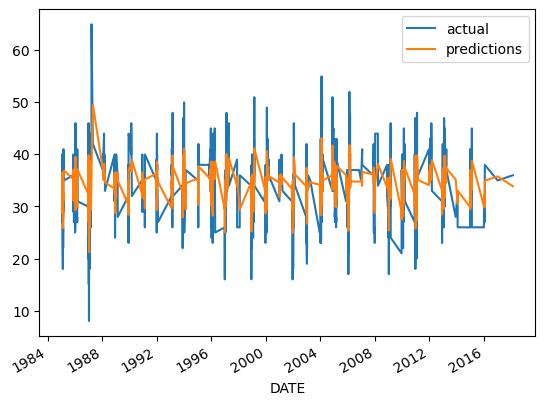

In [153]:
combined.plot()

In [154]:
reg.coef_

array([0.8631611 , 0.43467573, 0.03629007, 0.05133539])

In [155]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2020-12-31"]   #train is up to 2020
    test = core_weather.loc[:"2021-01-01"]    #test is from 2021-1-1 onwords
    reg.fit(train[predictors], train["target"])  #fitting model 
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test["target"], predictions)
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns=["actual", "predictions"]
    return error, combined

In [156]:
core_weather["month_max_average"] = core_weather["TMAX"].rolling(30).mean()

In [157]:
core_weather

,NAME,LONGITUDE,LATITUDE,ELEVATION,TAVG,TMAX,TMIN,SNWD,PRCP,target,month_max_average,month_day_max,monthly_average,day_of_year_average
DATE,,,,,,,,,,,,,,
1985-01-17,"PIESTANY, LO",17.833,48.617,164.0,13,24.0,5.0,4.7,0.00,27.0,NaN,1.188889,24.000000,24.000000
1985-01-21,"PIESTANY, LO",17.833,48.617,164.0,26,27.0,20.0,4.7,0.00,40.0,NaN,1.055556,25.500000,27.000000
1985-01-22,"PIESTANY, LO",17.833,48.617,164.0,36,40.0,26.0,4.7,0.00,37.0,NaN,0.720833,30.333333,40.000000
1985-01-31,"PIESTANY, LO",17.833,48.617,164.0,29,37.0,17.0,1.2,0.00,23.0,NaN,0.776577,32.000000,37.000000
1985-02-09,"PIESTANY, LO",17.833,48.617,164.0,22,23.0,20.0,0.8,0.06,18.0,NaN,1.224638,23.000000,23.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-22,"PIESTANY, LO",17.833,48.617,164.0,15,29.0,6.0,0.8,0.00,27.0,34.533333,1.190805,31.325688,33.571429
2016-01-23,"PIESTANY, LO",17.833,48.617,164.0,20,27.0,4.0,1.2,0.00,36.0,34.333333,1.271605,31.305936,30.666667
2016-01-26,"PIESTANY, LO",17.833,48.617,164.0,33,36.0,31.0,1.2,0.24,38.0,34.533333,0.959259,31.327273,30.166667


In [158]:
core_weather["month_day_max"] = core_weather["month_max_average"] / core_weather["TMAX"]

In [159]:
core_weather

,NAME,LONGITUDE,LATITUDE,ELEVATION,TAVG,TMAX,TMIN,SNWD,PRCP,target,month_max_average,month_day_max,monthly_average,day_of_year_average
DATE,,,,,,,,,,,,,,
1985-01-17,"PIESTANY, LO",17.833,48.617,164.0,13,24.0,5.0,4.7,0.00,27.0,NaN,NaN,24.000000,24.000000
1985-01-21,"PIESTANY, LO",17.833,48.617,164.0,26,27.0,20.0,4.7,0.00,40.0,NaN,NaN,25.500000,27.000000
1985-01-22,"PIESTANY, LO",17.833,48.617,164.0,36,40.0,26.0,4.7,0.00,37.0,NaN,NaN,30.333333,40.000000
1985-01-31,"PIESTANY, LO",17.833,48.617,164.0,29,37.0,17.0,1.2,0.00,23.0,NaN,NaN,32.000000,37.000000
1985-02-09,"PIESTANY, LO",17.833,48.617,164.0,22,23.0,20.0,0.8,0.06,18.0,NaN,NaN,23.000000,23.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-22,"PIESTANY, LO",17.833,48.617,164.0,15,29.0,6.0,0.8,0.00,27.0,34.533333,1.190805,31.325688,33.571429
2016-01-23,"PIESTANY, LO",17.833,48.617,164.0,20,27.0,4.0,1.2,0.00,36.0,34.333333,1.271605,31.305936,30.666667
2016-01-26,"PIESTANY, LO",17.833,48.617,164.0,33,36.0,31.0,1.2,0.24,38.0,34.533333,0.959259,31.327273,30.166667


In [160]:
predictors = ["PRCP", "TMAX", "TMIN","month_max_average","month_day_max"]

In [161]:
core_weather = core_weather.iloc[30:,:].copy()    #delete NaN from our table, delete first 5rows 

In [162]:
error, combined  = create_predictions(predictors, core_weather, reg)

In [163]:
error   #now its all good , we reduce it down. 

4.629177351622879

<AxesSubplot:xlabel='DATE'>

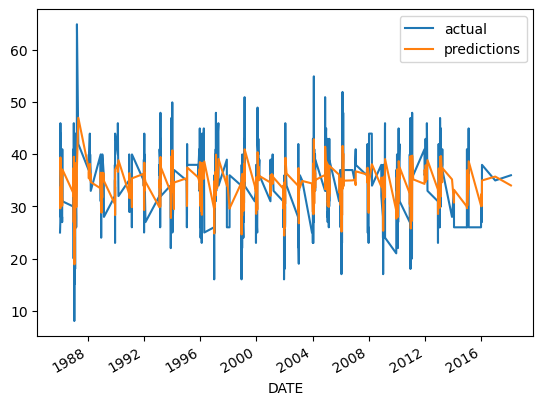

In [164]:
combined.plot()

still not good enought 

In [207]:
core_weather["monthly_average"]=core_weather["TMAX"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())

In [166]:
core_weather

,NAME,LONGITUDE,LATITUDE,ELEVATION,TAVG,TMAX,TMIN,SNWD,PRCP,target,month_max_average,month_day_max,monthly_average,day_of_year_average
DATE,,,,,,,,,,,,,,
1986-01-03,"PIESTANY, LO",17.833,48.617,164.0,31,33.0,29.0,1.2,0.00,25.0,31.100000,0.942424,33.000000,33.000000
1986-01-11,"PIESTANY, LO",17.833,48.617,164.0,19,25.0,8.0,0.8,0.18,27.0,31.033333,1.241333,29.000000,25.000000
1986-01-12,"PIESTANY, LO",17.833,48.617,164.0,25,27.0,23.0,4.7,0.15,39.0,30.600000,1.133333,28.333333,27.000000
1986-01-13,"PIESTANY, LO",17.833,48.617,164.0,33,39.0,14.0,5.9,0.05,46.0,30.666667,0.786325,31.000000,39.000000
1986-01-14,"PIESTANY, LO",17.833,48.617,164.0,38,46.0,34.0,2.0,0.28,41.0,31.433333,0.683333,34.000000,46.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-22,"PIESTANY, LO",17.833,48.617,164.0,15,29.0,6.0,0.8,0.00,27.0,34.533333,1.190805,31.339623,33.571429
2016-01-23,"PIESTANY, LO",17.833,48.617,164.0,20,27.0,4.0,1.2,0.00,36.0,34.333333,1.271605,31.319249,30.666667
2016-01-26,"PIESTANY, LO",17.833,48.617,164.0,33,36.0,31.0,1.2,0.24,38.0,34.533333,0.959259,31.341121,30.166667


In [167]:
core_weather["day_of_year_average"]= core_weather["TMAX"].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())

In [168]:
core_weather

,NAME,LONGITUDE,LATITUDE,ELEVATION,TAVG,TMAX,TMIN,SNWD,PRCP,target,month_max_average,month_day_max,monthly_average,day_of_year_average
DATE,,,,,,,,,,,,,,
1986-01-03,"PIESTANY, LO",17.833,48.617,164.0,31,33.0,29.0,1.2,0.00,25.0,31.100000,0.942424,33.000000,33.000000
1986-01-11,"PIESTANY, LO",17.833,48.617,164.0,19,25.0,8.0,0.8,0.18,27.0,31.033333,1.241333,29.000000,25.000000
1986-01-12,"PIESTANY, LO",17.833,48.617,164.0,25,27.0,23.0,4.7,0.15,39.0,30.600000,1.133333,28.333333,27.000000
1986-01-13,"PIESTANY, LO",17.833,48.617,164.0,33,39.0,14.0,5.9,0.05,46.0,30.666667,0.786325,31.000000,39.000000
1986-01-14,"PIESTANY, LO",17.833,48.617,164.0,38,46.0,34.0,2.0,0.28,41.0,31.433333,0.683333,34.000000,46.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-22,"PIESTANY, LO",17.833,48.617,164.0,15,29.0,6.0,0.8,0.00,27.0,34.533333,1.190805,31.339623,32.500000
2016-01-23,"PIESTANY, LO",17.833,48.617,164.0,20,27.0,4.0,1.2,0.00,36.0,34.333333,1.271605,31.319249,30.666667
2016-01-26,"PIESTANY, LO",17.833,48.617,164.0,33,36.0,31.0,1.2,0.24,38.0,34.533333,0.959259,31.341121,30.166667


update predictors

In [169]:
predictors = ["PRCP", "TMAX", "TMIN","month_max_average","month_day_max","day_of_year_average","monthly_average"]

In [170]:
error, combined  = create_predictions(predictors, core_weather, reg)

In [172]:
error

4.629594259551795

In [173]:
core_weather.corr()["target"]

LONGITUDE                   NaN
LATITUDE                    NaN
ELEVATION                   NaN
TAVG                   0.429988
TMAX                   0.466829
TMIN                   0.346242
SNWD                  -0.016117
PRCP                   0.134790
target                 1.000000
month_max_average      0.075037
month_day_max         -0.425303
monthly_average        0.210832
day_of_year_average    0.361589
Name: target, dtype: float64

In [174]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

This code appears to be creating a new column in the combined dataframe called diff, which is the absolute difference between the values in the actual column and the predictions column. The abs() function returns the absolute value of a number, which means it removes the negative sign from a number if it is negative. For example, abs(-5) would return 5, and abs(3) would return 3.

In [175]:
combined.sort_values("diff",ascending =False).head()   #show differences between predictions and actual temprerature 

,actual,predictions,diff
DATE,,,
1987-03-19,65.0,37.946276,27.053724
1987-01-06,15.0,36.273221,21.273221
2010-12-22,18.0,39.170852,21.170852
2006-01-21,17.0,35.311467,18.311467
2001-12-19,16.0,34.073412,18.073412


This code appears to be sorting the rows of the combined dataframe in descending order based on the values in the diff column, and then returning the top five rows using the head() function.

The sort_values() function is used to sort the rows of a dataframe based on one or more columns. In this case, the diff column is specified as the column to sort by, and the ascending parameter is set to False to sort the values in descending order.

The head() function returns the first n rows of a dataframe, where n is a user-specified number. In this case, n is not specified, so the default value of 5 is used, and the function returns the top five rows of the sorted dataframe.


AIDA visualisation 

In [197]:


# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns



GET DATE FROM TIMESTAMP & APPEND IT AS DATE INTO TABLE

In [238]:
core_weather.index = pd.to_datetime(core_weather.index)

In [241]:
core_weather["date"]=core_weather.index

In [242]:
core_weather

,NAME,LONGITUDE,LATITUDE,ELEVATION,TAVG,TMAX,TMIN,SNWD,PRCP,target,month_max_average,month_day_max,monthly_average,day_of_year_average,date
DATE,,,,,,,,,,,,,,,
1986-01-03,"PIESTANY, LO",17.833,48.617,164.0,31,33.0,29.0,1.2,0.00,25.0,31.100000,0.942424,33.000000,33.000000,1986-01-03
1986-01-11,"PIESTANY, LO",17.833,48.617,164.0,19,25.0,8.0,0.8,0.18,27.0,31.033333,1.241333,29.000000,25.000000,1986-01-11
1986-01-12,"PIESTANY, LO",17.833,48.617,164.0,25,27.0,23.0,4.7,0.15,39.0,30.600000,1.133333,28.333333,27.000000,1986-01-12
1986-01-13,"PIESTANY, LO",17.833,48.617,164.0,33,39.0,14.0,5.9,0.05,46.0,30.666667,0.786325,31.000000,39.000000,1986-01-13
1986-01-14,"PIESTANY, LO",17.833,48.617,164.0,38,46.0,34.0,2.0,0.28,41.0,31.433333,0.683333,34.000000,46.000000,1986-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-22,"PIESTANY, LO",17.833,48.617,164.0,15,29.0,6.0,0.8,0.00,27.0,34.533333,1.190805,31.339623,32.500000,2016-01-22
2016-01-23,"PIESTANY, LO",17.833,48.617,164.0,20,27.0,4.0,1.2,0.00,36.0,34.333333,1.271605,31.319249,30.666667,2016-01-23
2016-01-26,"PIESTANY, LO",17.833,48.617,164.0,33,36.0,31.0,1.2,0.24,38.0,34.533333,0.959259,31.341121,30.166667,2016-01-26


<AxesSubplot:xlabel='DATE'>

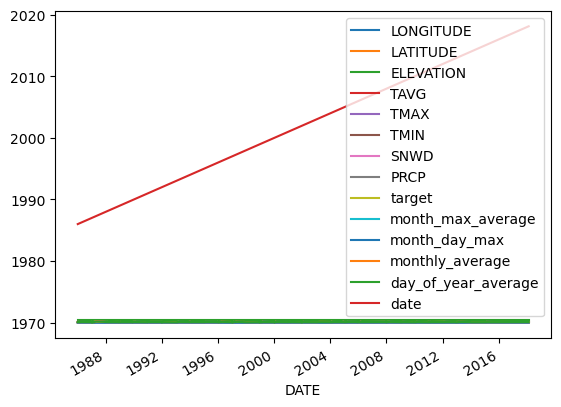

In [257]:
core_weather.plot()

<AxesSubplot:xlabel='DATE'>

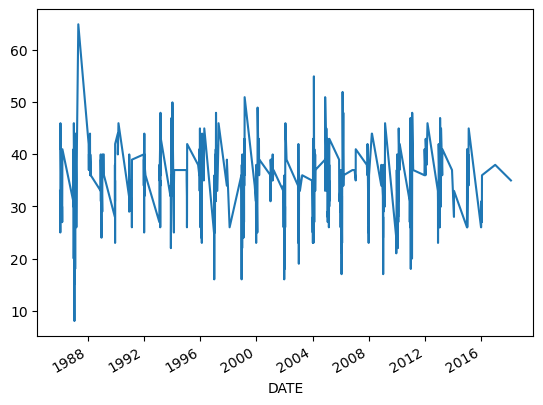

In [258]:
core_weather["TMAX"].plot()

<AxesSubplot:xlabel='DATE'>

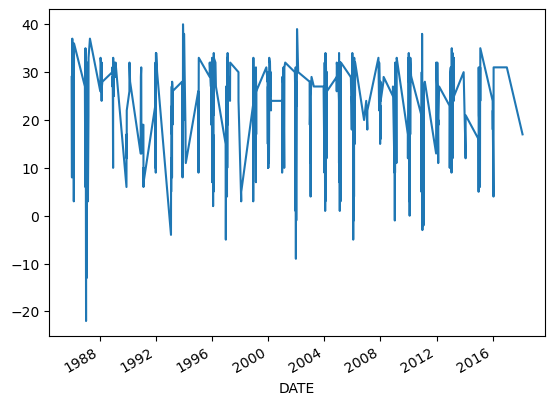

In [262]:
core_weather["TMIN"].plot()

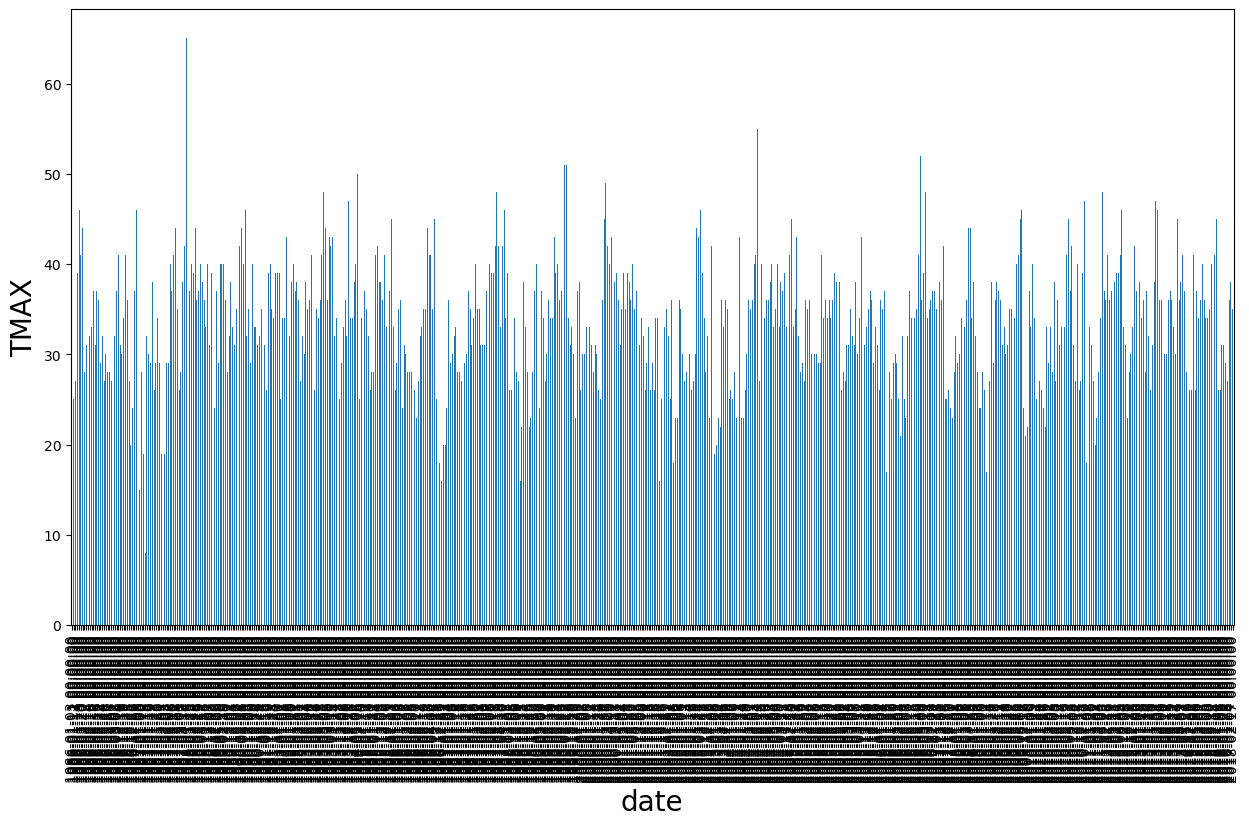

In [277]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))


means = core_weather.groupby(["date"]).mean()["TMAX"]
# Plot the results as a bar chart
means.plot(kind="bar")
plt.xlabel("date",fontsize=20)
plt.ylabel("TMAX",fontsize=20)
plt.show()

Extract year from datetime from the table column date and import new column year 

In [281]:
import datetime as dt
dates = core_weather['date']


In [282]:
dates = pd.to_datetime(dates)

In [293]:
years = [date.year for date in dates]

In [294]:
core_weather["year"]=years

In [295]:
core_weather

,NAME,LONGITUDE,LATITUDE,ELEVATION,TAVG,TMAX,TMIN,SNWD,PRCP,target,month_max_average,month_day_max,monthly_average,day_of_year_average,date,year
DATE,,,,,,,,,,,,,,,,
1986-01-03,"PIESTANY, LO",17.833,48.617,164.0,31,33.0,29.0,1.2,0.00,25.0,31.100000,0.942424,33.000000,33.000000,1986-01-03,1986
1986-01-11,"PIESTANY, LO",17.833,48.617,164.0,19,25.0,8.0,0.8,0.18,27.0,31.033333,1.241333,29.000000,25.000000,1986-01-11,1986
1986-01-12,"PIESTANY, LO",17.833,48.617,164.0,25,27.0,23.0,4.7,0.15,39.0,30.600000,1.133333,28.333333,27.000000,1986-01-12,1986
1986-01-13,"PIESTANY, LO",17.833,48.617,164.0,33,39.0,14.0,5.9,0.05,46.0,30.666667,0.786325,31.000000,39.000000,1986-01-13,1986
1986-01-14,"PIESTANY, LO",17.833,48.617,164.0,38,46.0,34.0,2.0,0.28,41.0,31.433333,0.683333,34.000000,46.000000,1986-01-14,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-22,"PIESTANY, LO",17.833,48.617,164.0,15,29.0,6.0,0.8,0.00,27.0,34.533333,1.190805,31.339623,32.500000,2016-01-22,2016
2016-01-23,"PIESTANY, LO",17.833,48.617,164.0,20,27.0,4.0,1.2,0.00,36.0,34.333333,1.271605,31.319249,30.666667,2016-01-23,2016
2016-01-26,"PIESTANY, LO",17.833,48.617,164.0,33,36.0,31.0,1.2,0.24,38.0,34.533333,0.959259,31.341121,30.166667,2016-01-26,2016


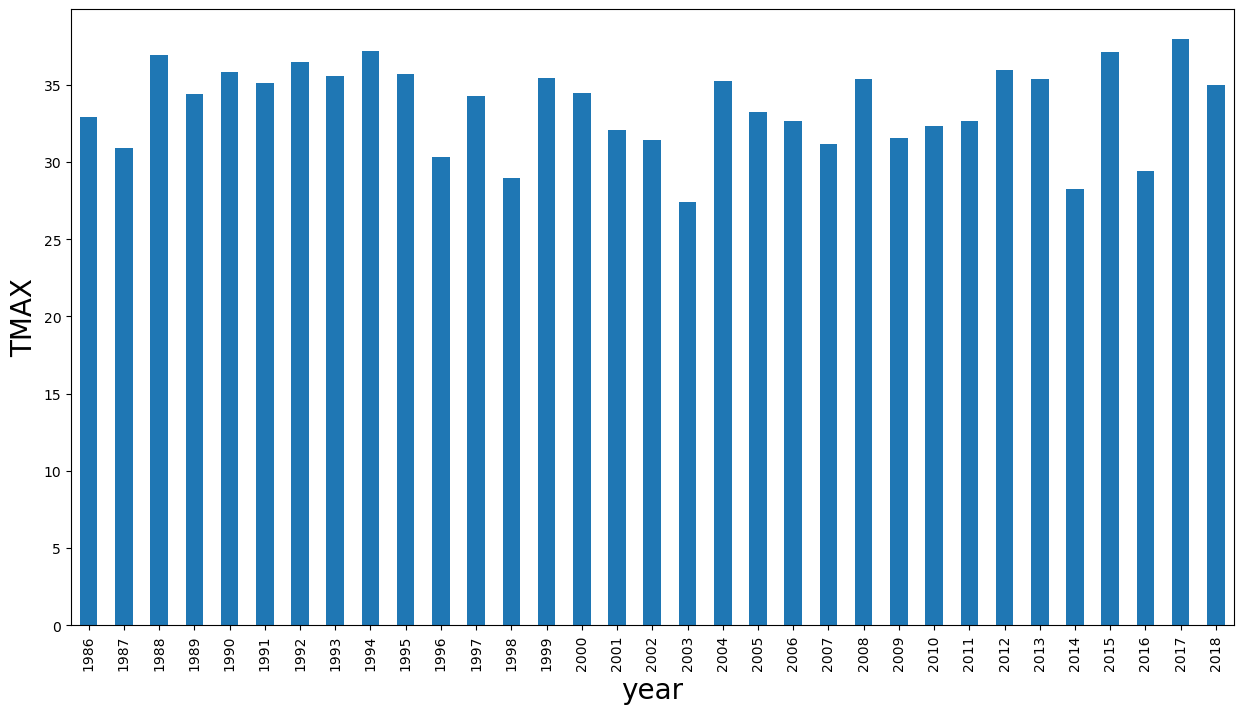

In [296]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))


means = core_weather.groupby(["year"]).mean()["TMAX"]
# Plot the results as a bar chart
means.plot(kind="bar")
plt.xlabel("year",fontsize=20)
plt.ylabel("TMAX",fontsize=20)
plt.show()

In [350]:
#min.temperature

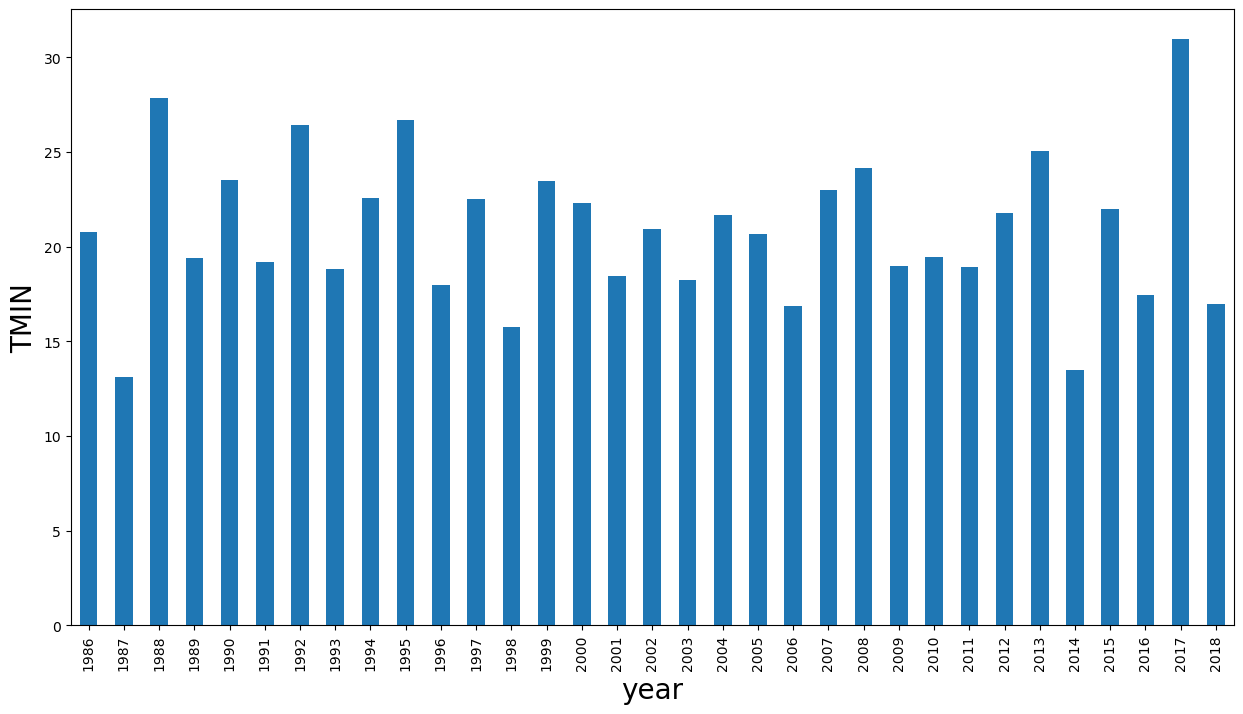

In [351]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))


means = core_weather.groupby(["year"]).mean()["TMIN"]
# Plot the results as a bar chart
means.plot(kind="bar")
plt.xlabel("year",fontsize=20)
plt.ylabel("TMIN",fontsize=20)
plt.show()

Display Info.part

In [299]:
import matplotlib.pyplot as plt

In [300]:
import numpy as np

In [311]:
#create scater chart
x=core_weather["year"]
y=core_weather["TMAX"]


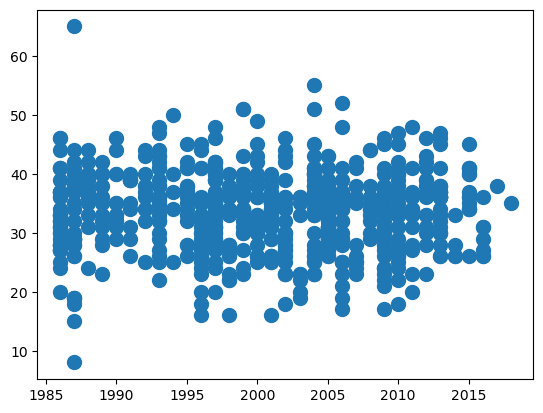

In [312]:
fig, ax = plt.subplots()

#colors=np.random.randint(1,5,size=len(x))
cmap = plt.cm.PiYG,
norm = plt.Normalize(1,4),
scatter = plt.scatter(
    x,y,
    #c=colors,
    s=100,
    cmap=cmap,
    norm=norm
)

In [336]:
#Create anotation object 
import matplotlib.pyplot as plt

In [345]:
x=core_weather["year"]
y=core_weather["TMAX"]

In [346]:
print(list(zip(x,y)))

[(1986, 33.0), (1986, 25.0), (1986, 27.0), (1986, 39.0), (1986, 46.0), (1986, 41.0), (1986, 44.0), (1986, 28.0), (1986, 31.0), (1986, 33.0), (1986, 32.0), (1986, 33.0), (1986, 37.0), (1986, 31.0), (1986, 37.0), (1986, 36.0), (1986, 29.0), (1986, 32.0), (1986, 27.0), (1986, 30.0), (1986, 28.0), (1986, 28.0), (1986, 27.0), (1986, 28.0), (1986, 32.0), (1986, 37.0), (1986, 41.0), (1986, 31.0), (1986, 30.0), (1986, 34.0), (1986, 41.0), (1986, 36.0), (1986, 27.0), (1986, 20.0), (1986, 24.0), (1986, 37.0), (1986, 46.0), (1987, 39.0), (1987, 15.0), (1987, 28.0), (1987, 19.0), (1987, 8.0), (1987, 32.0), (1987, 30.0), (1987, 29.0), (1987, 38.0), (1987, 26.0), (1987, 29.0), (1987, 34.0), (1987, 29.0), (1987, 19.0), (1987, 18.0), (1987, 19.0), (1987, 29.0), (1987, 29.0), (1987, 40.0), (1987, 37.0), (1987, 41.0), (1987, 44.0), (1987, 35.0), (1987, 26.0), (1987, 28.0), (1987, 38.0), (1987, 42.0), (1987, 65.0), (1988, 42.0), (1988, 37.0), (1988, 40.0), (1988, 39.0), (1988, 44.0), (1988, 36.0), (1988,

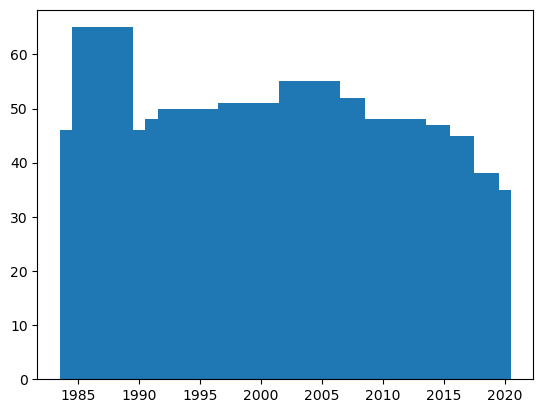

In [347]:

plt.bar(x,y, width=5)
plt.annotate('min_value',
             xy=(10,1))
plt.show()